In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [111]:
df = pd.read_csv('./Cancer_Data.csv', delimiter=";", index_col=0)

In [112]:
# calculando a média de cada variável
dfm = df.mean()

# calculando o desviopadrão de cada variável
dfdp = df.std()

# escalando os dados
dfauto = (df - dfm) / dfdp

In [113]:
corr = dfauto.iloc[:, 0:].corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.263931,0.997641,0.987510,0.189464,0.475977,0.698342,0.815467,0.148668,-0.316206,...,0.963658,0.230359,0.959253,0.935556,0.125883,0.360476,0.533750,0.723033,0.136218,-0.032005
texture_mean,0.263931,1.000000,0.268228,0.264035,-0.041360,0.167354,0.249740,0.234172,0.041411,-0.095113,...,0.296484,0.902762,0.298736,0.292287,0.082373,0.211169,0.247534,0.231552,0.062439,0.066509
perimeter_mean,0.997641,0.268228,1.000000,0.986065,0.230195,0.530079,0.739809,0.846022,0.189168,-0.263300,...,0.963102,0.236011,0.964583,0.935135,0.160045,0.405553,0.573104,0.752136,0.163540,0.013149
area_mean,0.987510,0.264035,0.986065,1.000000,0.185858,0.462510,0.699569,0.810301,0.145128,-0.297993,...,0.955498,0.223819,0.952078,0.951946,0.118046,0.333657,0.510932,0.694353,0.108364,-0.043437
smoothness_mean,0.189464,-0.041360,0.230195,0.185858,1.000000,0.710275,0.588266,0.592287,0.599969,0.631894,...,0.231400,0.043058,0.260042,0.213150,0.823954,0.522242,0.511240,0.556898,0.422382,0.545263
compactness_mean,0.475977,0.167354,0.530079,0.462510,0.710275,1.000000,0.886977,0.825437,0.661939,0.599179,...,0.503685,0.193660,0.562169,0.473089,0.612618,0.859525,0.830026,0.812268,0.527216,0.683914
concavity_mean,0.698342,0.249740,0.739809,0.699569,0.588266,0.886977,1.000000,0.943051,0.542329,0.318264,...,0.701833,0.254134,0.746135,0.681578,0.497902,0.738234,0.876636,0.866295,0.408968,0.471305
concave points_mean,0.815467,0.234172,0.846022,0.810301,0.592287,0.825437,0.943051,1.000000,0.490150,0.184507,...,0.819381,0.244830,0.847573,0.792321,0.481248,0.644777,0.772147,0.904192,0.374158,0.352303
symmetry_mean,0.148668,0.041411,0.189168,0.145128,0.599969,0.661939,0.542329,0.490150,1.000000,0.542017,...,0.190570,0.076987,0.228613,0.174122,0.481669,0.526915,0.486253,0.473206,0.717341,0.487630
fractal_dimension_mean,-0.316206,-0.095113,-0.263300,-0.297993,0.631894,0.599179,0.318264,0.184507,0.542017,1.000000,...,-0.257405,-0.044293,-0.206093,-0.245307,0.552363,0.500898,0.346623,0.204225,0.376518,0.776104


<Axes: >

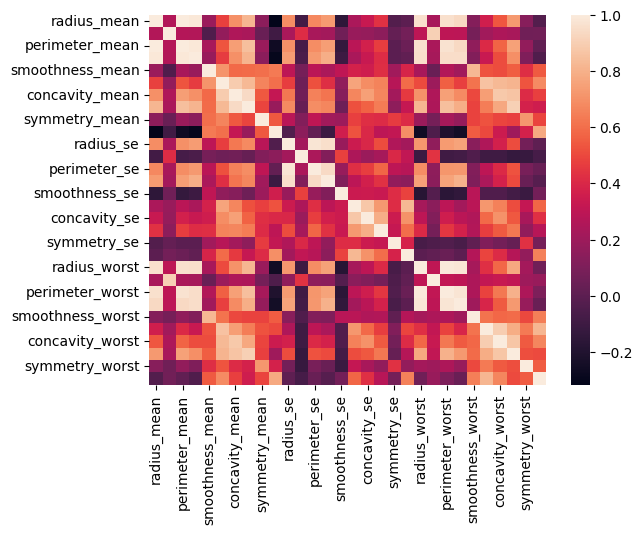

In [124]:
sns.heatmap(corr)

<Axes: >

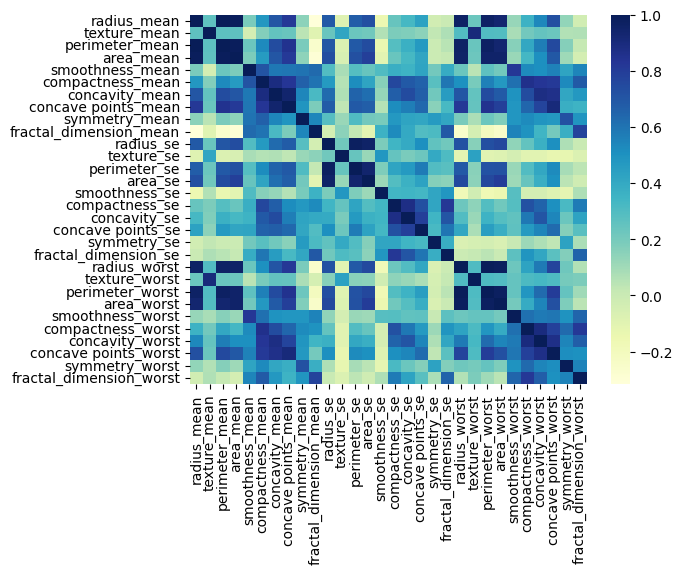

In [114]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu")

In [115]:
pca = PCA(n_components=10)

In [116]:
x = np.asanyarray(dfauto.iloc[:,:])

In [117]:
pca.fit(x)
pca.components_

array([[ 2.13597051e-01,  8.41344674e-02,  2.23020547e-01,
         2.13963441e-01,  1.56731676e-01,  2.38579297e-01,
         2.59372961e-01,  2.59017371e-01,  1.48900537e-01,
         6.98343146e-02,  2.00027308e-01,  2.04082011e-02,
         2.05613493e-01,  1.95681231e-01,  3.00250970e-02,
         1.80705310e-01,  1.86892496e-01,  1.91821115e-01,
         6.14103357e-02,  1.21994263e-01,  2.21654300e-01,
         8.68750516e-02,  2.31481002e-01,  2.16874510e-01,
         1.38426105e-01,  2.05329066e-01,  2.30296161e-01,
         2.47590071e-01,  1.22218987e-01,  1.26728101e-01],
       [-2.39018622e-01, -5.60707153e-02, -2.19791572e-01,
        -2.42121149e-01,  1.94360529e-01,  1.60237350e-01,
         3.71766912e-02, -3.77968449e-02,  2.01721282e-01,
         3.61983700e-01, -1.40694013e-01,  7.28839113e-02,
        -1.16967881e-01, -1.75476832e-01,  1.69436865e-01,
         2.06965439e-01,  1.50281776e-01,  8.62097011e-02,
         1.53067251e-01,  2.65696708e-01, -2.25527616e-

Text(0, 0.5, 'Eigenvalue')

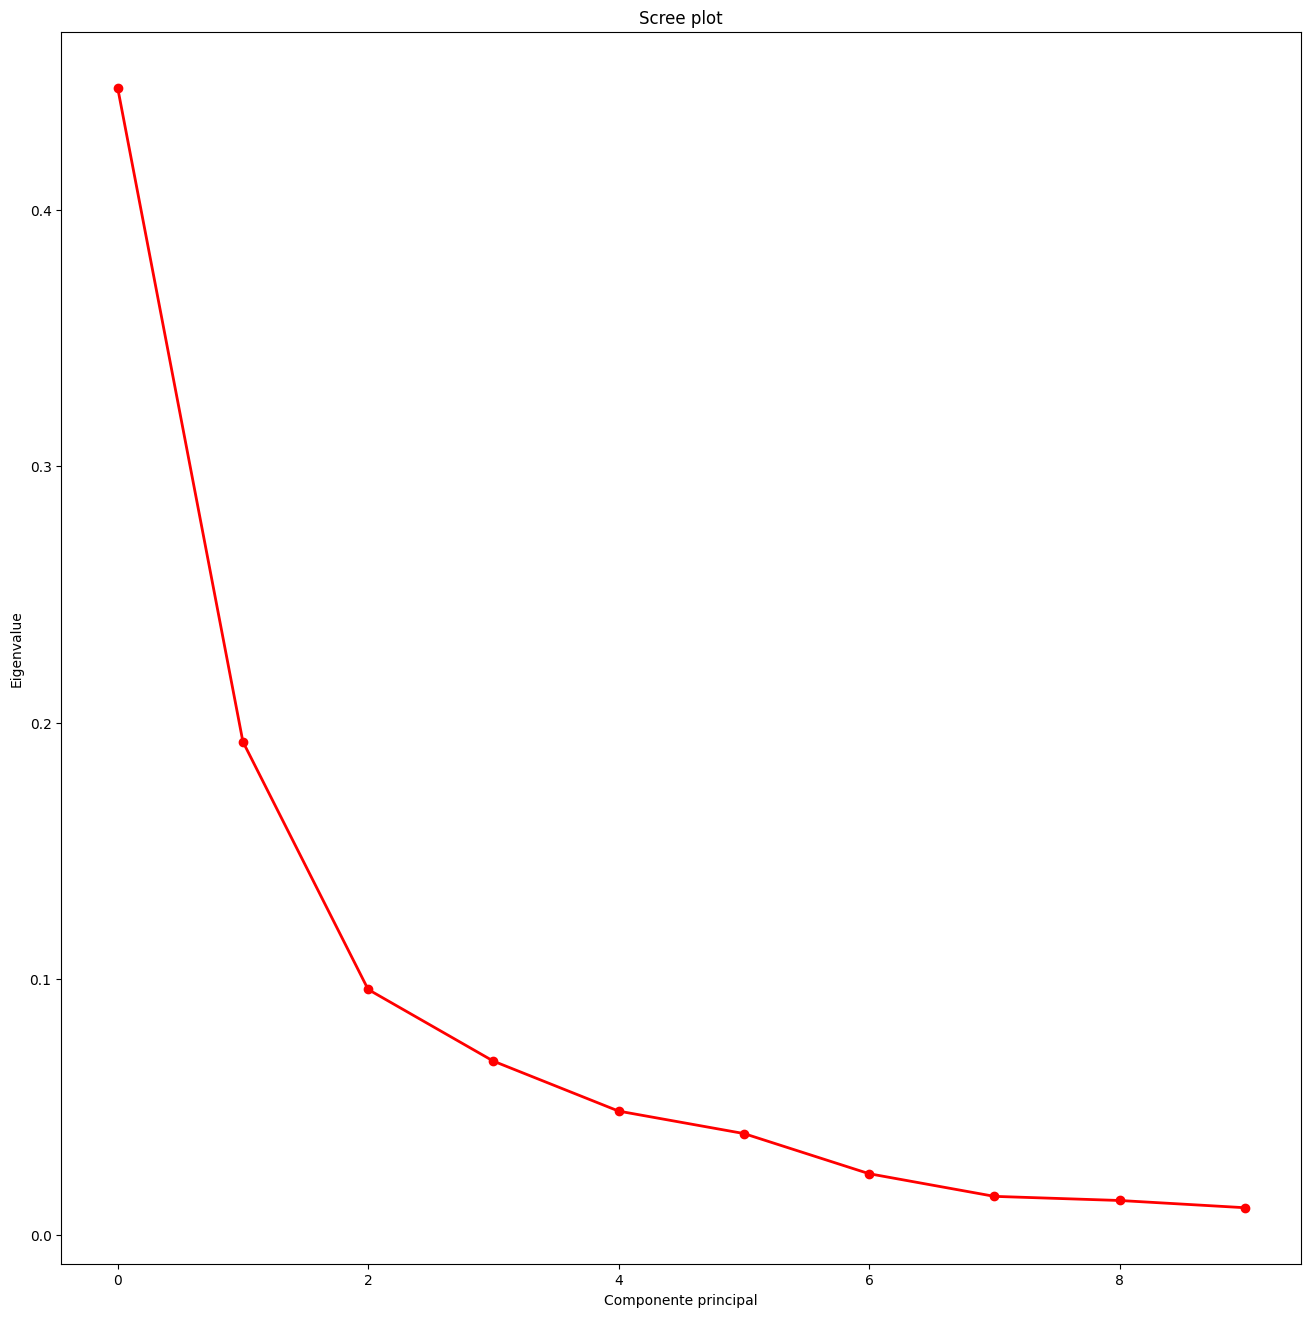

In [118]:
fig = plt.figure(figsize = (16, 16))

plt.plot(pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree plot')
plt.xlabel('Componente principal')
plt.ylabel('Eigenvalue')

In [119]:
pca.explained_variance_ratio_

array([0.44759571, 0.19254036, 0.09589945, 0.06794367, 0.04845899,
       0.03970349, 0.02403584, 0.01520578, 0.01359688, 0.01077552])

In [120]:
pca1 = pca.transform(x)[:,0]
pca2 = pca.transform(x)[:,1]
pca3 = pca.transform(x)[:,2]
pca4 = pca.transform(x)[:,3]
pcall = pca.transform(x)

In [121]:
df['pca1'] = pca1
df['pca2'] = pca2
df['pca3'] = pca3
df['pca4'] = pca4

In [122]:
df.sort_values(by='pca1', ascending=True).head(100)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,pca1,pca2,pca3,pca4
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.000000,0.000000,0.1587,0.05884,...,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039,-6.155421,-0.502581,1.667574,1.782343
B,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,0.06833,...,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804,-5.939358,0.684513,0.687553,-0.937414
B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.000000,0.000000,0.1060,0.05502,...,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,-5.628716,-2.023120,3.754328,4.654895
B,12.49,16.85,79.19,481.6,0.08511,0.03834,0.004473,0.006423,0.1215,0.05673,...,0.11040,0.04953,0.01938,0.02784,0.1917,0.06174,-5.552558,-2.116666,-0.356966,-0.917483
B,13.50,12.71,85.69,566.2,0.07376,0.03614,0.002758,0.004419,0.1365,0.05335,...,0.09023,0.05836,0.01379,0.02210,0.2267,0.06192,-5.371404,-2.830678,-0.466943,-1.838527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B,14.64,16.85,94.21,666.0,0.08641,0.06698,0.051920,0.027910,0.1409,0.05355,...,0.11420,0.20700,0.24370,0.07828,0.2455,0.06596,-3.033533,-2.218374,-0.971616,-0.124276
B,12.87,19.54,82.67,509.2,0.09136,0.07883,0.017970,0.020900,0.1861,0.06347,...,0.12140,0.16520,0.07127,0.06384,0.3313,0.07735,-2.959173,-0.250055,-0.386812,-0.329756
B,10.94,18.59,70.39,370.0,0.10040,0.07460,0.049440,0.029320,0.1486,0.06615,...,0.13630,0.16440,0.14120,0.07887,0.2251,0.07732,-2.938347,0.741187,1.392396,0.089138


In [123]:
df.sort_values(by='pca1', ascending=False).head(100)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,pca1,pca2,pca3,pca4
diagnosis,,,,,,,,,,,,,,,,,,,,,
M,27.42,26.27,186.9,2501.0,0.10840,0.1988,0.36350,0.16890,0.2061,0.05623,...,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427,14.593869,-8.003586,4.745439,-1.857281
M,24.25,20.20,166.2,1761.0,0.14470,0.2867,0.42680,0.20120,0.2655,0.06877,...,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009,12.246940,1.964244,6.686705,-1.894460
M,22.27,19.67,152.8,1509.0,0.13260,0.2768,0.42640,0.18230,0.2556,0.07039,...,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789,12.130808,0.886477,0.525683,-1.290817
M,20.18,23.97,143.7,1245.0,0.12860,0.3454,0.37540,0.16040,0.2906,0.08142,...,0.1639,0.6164,0.7681,0.2508,0.5440,0.09964,11.010615,4.471083,2.539714,-0.426126
M,28.11,18.47,188.5,2499.0,0.11420,0.1516,0.32010,0.15950,0.1648,0.05525,...,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525,10.729556,-8.058323,8.390842,-4.981237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M,17.29,22.13,114.4,947.8,0.08999,0.1273,0.09697,0.07507,0.2108,0.05464,...,0.1134,0.2867,0.2298,0.1528,0.3067,0.07484,2.538227,-0.956056,2.471370,-0.183042
M,20.64,17.35,134.8,1335.0,0.09446,0.1076,0.15270,0.08941,0.1571,0.05478,...,0.1562,0.3055,0.4159,0.2112,0.2689,0.07055,2.524376,-3.677352,-1.431101,-1.127367
M,17.08,27.15,111.2,930.9,0.09898,0.1110,0.10070,0.06431,0.1793,0.06281,...,0.1600,0.2444,0.2639,0.1555,0.3010,0.09060,2.513552,-1.543927,0.887249,1.327707
